# Optimization Methods

## Non-constrained Optimization

#### Line Search Method

In [1]:
import numpy as np

def line_search_method(f, grad_f, x0, alpha=1.0, rho=0.5, c=1e-4, tol=1e-6, max_iter=1000):
    x = x0.copy()
    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        d = -grad  # steepest descent
        t = alpha
        # Backtracking line search
        while f(x + t * d) > f(x) + c * t * grad.dot(d):
            t *= rho
        x += t * d
    return x

# Example function and gradient
f = lambda x: (x - 3)**2
grad_f = lambda x: 2 * (x - 3)

# Initial guess
x0 = np.array([10.0])

# Run line search optimization
x_opt = line_search_method(f, grad_f, x0)

print("Optimal x:", x_opt)

Optimal x: [3.]


#### Trust Region Method

In [2]:
def trust_region_method(f, grad_f, hess_f, x0, delta=1.0, eta=0.15, tol=1e-6, max_iter=100):
    x = x0.copy()
    for i in range(max_iter):
        g = grad_f(x)
        B = hess_f(x)
        if np.linalg.norm(g) < tol:
            break

        # Cauchy point: approximate trust-region step
        p = - (g.dot(g)) / (g.dot(B @ g)) * g
        if np.linalg.norm(p) > delta:
            p = delta * p / np.linalg.norm(p)

        # Predicted and actual reduction
        m0 = f(x)
        m_p = f(x) + g.dot(p) + 0.5 * p.dot(B @ p)
        rho = (f(x) - f(x + p)) / (m0 - m_p)

        # Step acceptance
        if rho > eta:
            x = x + p  # accept
        # Update trust region size
        if rho < 0.25:
            delta *= 0.25
        elif rho > 0.75 and np.linalg.norm(p) == delta:
            delta = min(2 * delta, 10.0)
    return x

# Define quadratic function, gradient, and Hessian
f = lambda x: (x - 2)**2
grad_f = lambda x: 2 * (x - 2)
hess_f = lambda x: np.array([[2.0]])  # constant Hessian

# Initial guess
x0 = np.array([8.0])

# Run trust-region optimization
x_opt = trust_region_method(f, grad_f, hess_f, x0)

print("Optimal x:", x_opt)

Optimal x: [2.]


#### Newton's Method

In [3]:
def newtons_method(f, grad_f, hess_f, x0, tol=1e-6, max_iter=100):
    x = x0.copy()
    for i in range(max_iter):
        g = grad_f(x)
        H = hess_f(x)

        # Check convergence
        if np.linalg.norm(g) < tol:
            break

        # Newton step: solve H p = -g
        try:
            p = -np.linalg.solve(H, g)
        except np.linalg.LinAlgError:
            print("Hessian not invertible at iteration", i)
            break

        # Update step
        x += p

    return x

# Define function, gradient, and Hessian
f = lambda x: (x - 4)**2
grad_f = lambda x: 2 * (x - 4)
hess_f = lambda x: np.array([[2.0]])  # constant Hessian

# Initial guess
x0 = np.array([10.0])

# Run Newton’s method
x_opt = newtons_method(f, grad_f, hess_f, x0)

print("Optimal x:", x_opt)

Optimal x: [4.]


## Constrained Optimization

#### Simplex Method

Optimal (x, y): [2.4 1.8]
Optimal objective value: -10.8


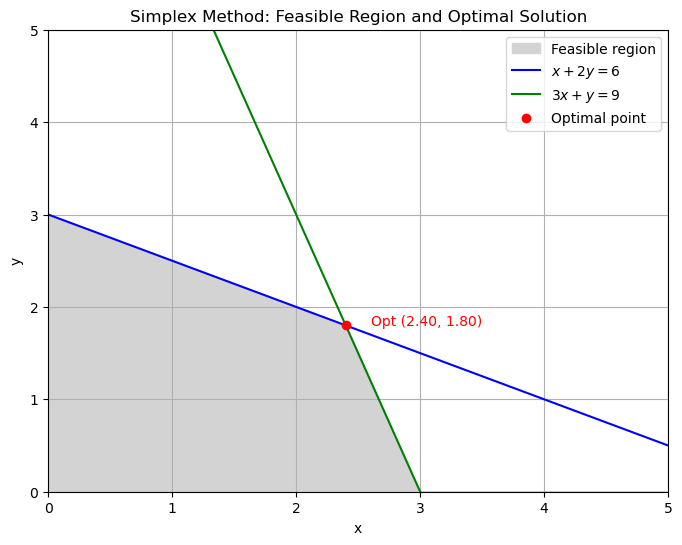

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# --- Simplex solver function ---
def simplex_method(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None):
    """
    Solve a linear programming problem using the Simplex method.
    Minimize: c^T x
    Subject to: A_ub x <= b_ub, x >= 0
    """
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, method='highs')
    return result


# --- Problem setup ---
# Minimize f(x, y) = -3x - 2y  (i.e. maximize 3x + 2y)
c = [-3, -2]
A_ub = [
    [1, 2],
    [3, 1]
]
b_ub = [6, 9]

# --- Solve using simplex ---
result = simplex_method(c, A_ub=A_ub, b_ub=b_ub)
x_opt, y_opt = result.x
print("Optimal (x, y):", result.x)
print("Optimal objective value:", result.fun)

# --- Visualization ---
x = np.linspace(0, 10, 400)
y1 = (6 - x) / 2      # from x + 2y <= 6
y2 = (9 - 3*x)        # from 3x + y <= 9

plt.figure(figsize=(8, 6))

# Feasible region
y3 = np.maximum(0, np.minimum(y1, y2))
plt.fill_between(x, 0, y3, color='lightgray', label='Feasible region')

# Constraint lines
plt.plot(x, y1, label=r'$x + 2y = 6$', color='blue')
plt.plot(x, y2, label=r'$3x + y = 9$', color='green')

# Optimal point
plt.scatter(x_opt, y_opt, color='red', zorder=5, label='Optimal point')

# Annotate
plt.text(x_opt + 0.2, y_opt, f'Opt ({x_opt:.2f}, {y_opt:.2f})', color='red')
plt.title('Simplex Method: Feasible Region and Optimal Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid(True)
plt.show()

#### Interior Point Method

Optimal (x, y): [2.4 1.8]
Optimal objective value: -10.799999999993567


/var/folders/38/22n3rn6s7gjdhyf__np8757r0000gn/T/ipykernel_50787/666097455.py:12: DeprecationWarning: `method='interior-point'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, method='interior-point')


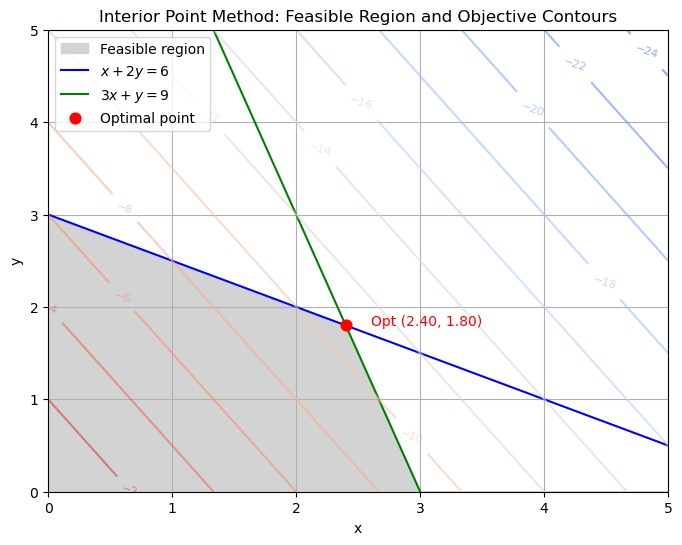

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# --- Interior Point Solver ---
def interior_point_method(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None):
    """
    Solve a linear programming problem using the Interior Point method.
    Minimize: c^T x
    Subject to: A_ub x <= b_ub, x >= 0
    """
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, method='interior-point')
    return result


# --- Problem setup ---
# Minimize f(x, y) = -3x - 2y  (equivalently maximize 3x + 2y)
c = [-3, -2]
A_ub = [
    [1, 2],
    [3, 1]
]
b_ub = [6, 9]

# --- Solve using interior point ---
result = interior_point_method(c, A_ub=A_ub, b_ub=b_ub)
x_opt, y_opt = result.x
print("Optimal (x, y):", result.x)
print("Optimal objective value:", result.fun)

# --- Plot setup ---
x = np.linspace(0, 5, 400)
y = np.linspace(0, 5, 400)
X, Y = np.meshgrid(x, y)

# Objective function (for contour lines)
Z = -3*X - 2*Y  # since we minimize -3x - 2y

# Constraints
y1 = (6 - x) / 2      # from x + 2y <= 6
y2 = (9 - 3*x)        # from 3x + y <= 9

plt.figure(figsize=(8, 6))

# Feasible region (shaded)
y3 = np.maximum(0, np.minimum(y1, y2))
plt.fill_between(x, 0, y3, color='lightgray', label='Feasible region')

# Constraint lines
plt.plot(x, y1, label=r'$x + 2y = 6$', color='blue')
plt.plot(x, y2, label=r'$3x + y = 9$', color='green')

# Objective function contours
contours = plt.contour(X, Y, Z, levels=15, cmap='coolwarm', alpha=0.6)
plt.clabel(contours, inline=True, fontsize=8)

# Optimal point
plt.scatter(x_opt, y_opt, color='red', zorder=5, s=60, label='Optimal point')
plt.text(x_opt + 0.2, y_opt, f'Opt ({x_opt:.2f}, {y_opt:.2f})', color='red')

# Formatting
plt.title('Interior Point Method: Feasible Region and Objective Contours')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid(True)
plt.show()

#### Ellipsoid Method

Approximate optimal point: [5.54677376 3.27145879]


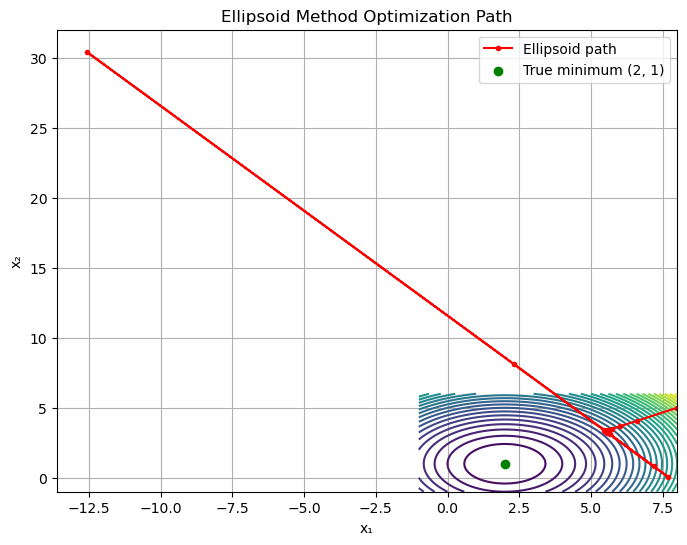

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def ellipsoid_method(f, grad_f, x0, tol=1e-4, max_iter=100):
    """
    Simplified 2D ellipsoid method for convex optimization.
    f: objective function
    grad_f: gradient function
    x0: initial center
    """
    n = len(x0)
    x = x0.copy()
    P = np.eye(n) * 5.0  # initial shape matrix (large ellipsoid)

    trajectory = [x.copy()]
    for k in range(max_iter):
        g = grad_f(x)
        if np.linalg.norm(g) < tol:
            break

        # Normalize gradient direction
        g = g / np.linalg.norm(g)
        # Update center and ellipsoid shape
        x = x - (1 / (n + 1)) * P @ g
        P = (n**2 / (n**2 - 1)) * (P - (2 / (n + 1)) * (P @ np.outer(g, g) @ P) / (g.T @ P @ g))
        trajectory.append(x.copy())

    return np.array(trajectory)

# Define function and gradient
f = lambda x: (x[0] - 2)**2 + (x[1] - 1)**2
grad_f = lambda x: np.array([2*(x[0] - 2), 2*(x[1] - 1)])

# Run Ellipsoid method
x0 = np.array([8.0, 5.0])
trajectory = ellipsoid_method(f, grad_f, x0, max_iter=40)

print("Approximate optimal point:", trajectory[-1])

# Create contour plot of the quadratic bowl
x = np.linspace(-1, 8, 400)
y = np.linspace(-1, 6, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 2)**2 + (Y - 1)**2

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.plot(trajectory[:,0], trajectory[:,1], 'r.-', label='Ellipsoid path')
plt.scatter(2, 1, color='green', label='True minimum (2, 1)', zorder=5)
plt.title('Ellipsoid Method Optimization Path')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.legend()
plt.grid(True)
plt.show()

## General Optimizaiton

#### Penalty Method

Approximate constrained minimum: [1. 2.]


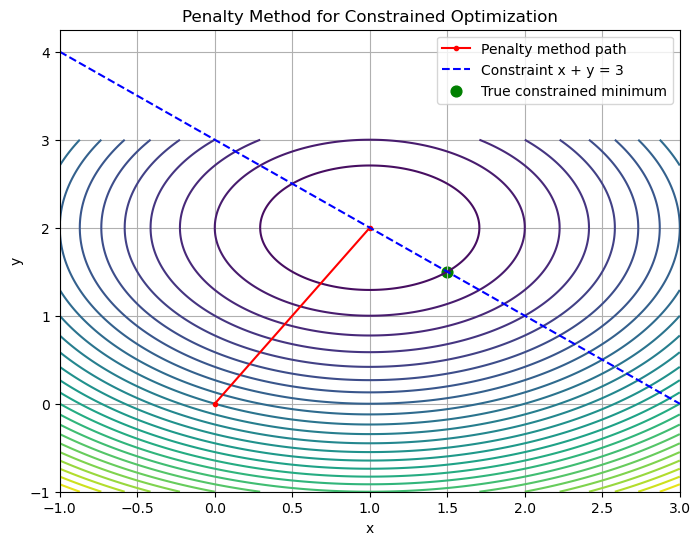

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Objective and constraint
f = lambda x, y: (x - 1)**2 + (y - 2)**2
g = lambda x, y: x + y - 3  # equality constraint

# Penalty method
def penalty_method(f, g, x0, mu_init=1, mu_mult=10, tol=1e-4, max_iter=10):
    x = np.array(x0, dtype=float)
    mu = mu_init
    trajectory = [x.copy()]

    for k in range(max_iter):
        # Define penalized objective
        F = lambda z: f(z[0], z[1]) + mu * (g(z[0], z[1])**2)
        
        # Gradient descent to minimize F
        lr = 0.05
        for _ in range(200):
            grad_x = (2*(x[0]-1) + 2*mu*g(x[0],x[1])) if g(x[0],x[1])>0 else (2*(x[0]-1))
            grad_y = (2*(x[1]-2) + 2*mu*g(x[0],x[1])) if g(x[0],x[1])>0 else (2*(x[1]-2))
            grad = np.array([grad_x, grad_y])
            x -= lr * grad
        
        trajectory.append(x.copy())
        if abs(g(x[0], x[1])) < tol:
            break
        mu *= mu_mult  # increase penalty parameter
    return np.array(trajectory)

x0 = [0.0, 0.0]
trajectory = penalty_method(f, g, x0)
print("Approximate constrained minimum:", trajectory[-1])

# Create grid for contour plot
x = np.linspace(-1, 3, 300)
y = np.linspace(-1, 3, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.plot(trajectory[:,0], trajectory[:,1], 'r.-', label='Penalty method path')

# Constraint line: x + y = 3
y_constraint = 3 - x
plt.plot(x, y_constraint, 'b--', label='Constraint x + y = 3')

# True solution
plt.scatter(1.5, 1.5, color='green', s=60, label='True constrained minimum')

plt.title('Penalty Method for Constrained Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Augmented Lagrangian Method

Approximate constrained minimum: [1. 2.]


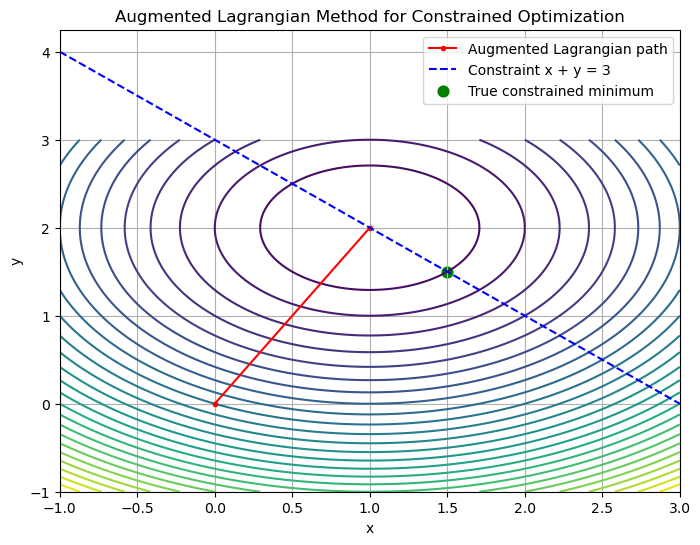

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Objective and constraint
f = lambda x, y: (x - 1)**2 + (y - 2)**2
g = lambda x, y: x + y - 3  # equality constraint

# Augmented Lagrangian method
def augmented_lagrangian_method(f, g, x0, mu=1.0, lam=0.0, tol=1e-4, max_outer=10, max_inner=200):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]

    for outer in range(max_outer):
        # Minimize L_A(x, lambda, mu)
        lr = 0.05
        for inner in range(max_inner):
            grad_x = 2*(x[0] - 1) + lam * 1 + mu * g(x[0], x[1]) * 1
            grad_y = 2*(x[1] - 2) + lam * 1 + mu * g(x[0], x[1]) * 1
            grad = np.array([grad_x, grad_y])
            x -= lr * grad
        
        trajectory.append(x.copy())
        
        # Update lambda
        lam = lam + mu * g(x[0], x[1])
        
        # Check constraint satisfaction
        if abs(g(x[0], x[1])) < tol:
            break
    return np.array(trajectory)

x0 = [0.0, 0.0]
trajectory = augmented_lagrangian_method(f, g, x0)
print("Approximate constrained minimum:", trajectory[-1])

# Contour of f(x, y)
x = np.linspace(-1, 3, 300)
y = np.linspace(-1, 3, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')

# Plot AL trajectory
plt.plot(trajectory[:,0], trajectory[:,1], 'r.-', label='Augmented Lagrangian path')

# Constraint line
y_constraint = 3 - x
plt.plot(x, y_constraint, 'b--', label='Constraint x + y = 3')

# True solution
plt.scatter(1.5, 1.5, color='green', s=60, label='True constrained minimum')

plt.title('Augmented Lagrangian Method for Constrained Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Alternating Direction Multiplier Method

Recovered coefficients:
[-3.000e-02  0.000e+00  0.000e+00  0.000e+00 -0.000e+00  1.900e-02
 -0.000e+00 -1.000e-02  1.041e+00 -1.034e+00  7.000e-03  1.217e+00
 -1.481e+00 -1.282e+00  0.000e+00 -0.000e+00 -0.000e+00  0.000e+00
 -3.000e-03 -0.000e+00  1.337e+00 -0.000e+00 -0.000e+00  1.790e+00
 -8.000e-03  2.214e+00 -2.000e-03  1.355e+00 -1.659e+00 -3.000e-03]


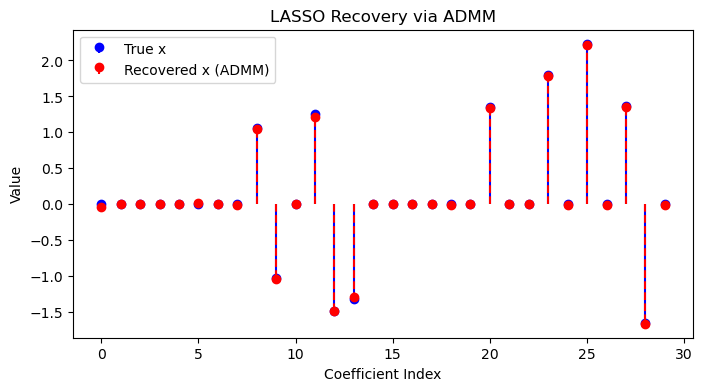

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def soft_threshold(x, kappa):
    """Soft thresholding operator"""
    return np.sign(x) * np.maximum(np.abs(x) - kappa, 0)

def admm_lasso(A, b, lam=1.0, rho=1.0, max_iter=1000, tol=1e-4):
    n = A.shape[1]
    x = np.zeros(n)
    z = np.zeros(n)
    u = np.zeros(n)

    # Precompute
    AtA = A.T @ A
    Atb = A.T @ b
    I = np.eye(n)

    # Cholesky pre-factorization for efficiency
    L = np.linalg.cholesky(AtA + rho * I)
    U = L.T

    for k in range(max_iter):
        # x-update: minimize quadratic
        q = Atb + rho * (z - u)
        x = np.linalg.solve(U, np.linalg.solve(L, q))

        # z-update: soft thresholding
        z_old = z.copy()
        z = soft_threshold(x + u, lam / rho)

        # u-update: dual variable
        u += x - z

        # Check convergence
        if np.linalg.norm(x - z) < tol:
            break

    return x, z

# Generate synthetic regression data
np.random.seed(0)
m, n = 50, 30
A = np.random.randn(m, n)
x_true = np.random.randn(n)
x_true[np.abs(x_true) < 1.0] = 0  # induce sparsity
b = A @ x_true + 0.1 * np.random.randn(m)

# Run ADMM
x_est, z_est = admm_lasso(A, b, lam=0.5)

print("Recovered coefficients:")
print(np.round(z_est, 3))

plt.figure(figsize=(8,4))
plt.stem(x_true, label="True x", basefmt=" ", linefmt="b-", markerfmt="bo")
plt.stem(z_est, label="Recovered x (ADMM)", basefmt=" ", linefmt="r--", markerfmt="ro")
plt.legend()
plt.title("LASSO Recovery via ADMM")
plt.xlabel("Coefficient Index")
plt.ylabel("Value")
plt.show()